In [100]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import os
from matplotlib import pyplot as plt
os.chdir('/disk/scratch/local.4/harry/TDX/')

In [103]:
data = np.load('data.npy')
print(data.shape)
data = np.moveaxis(data.reshape(5,-1),0,-1)
print(data.shape)
data = data[np.isnan(data).sum(axis=1) == 0 ,:]
print(data.shape)

N = data.shape[0]
Ntrain = int(N*0.7)
indices = np.random.permutation(N)
trainingI, testI = indices[:Ntrain], indices[Ntrain:]
trainData, testData = data[trainingI,:], data[testI,:]
print(trainData.shape)
print(testData.shape)

(5, 78, 93)
(7254, 5)
(298, 5)
(208, 5)
(90, 5)


Coefficient of determination:  0.318318328931127


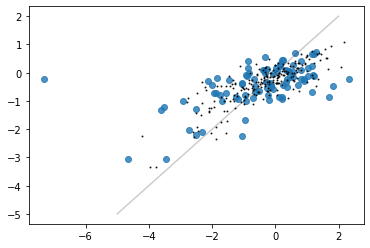

In [118]:
regr = RandomForestRegressor(max_depth =5,n_estimators=55)
regr.fit(trainData[:,1:],trainData[:,0])

pred = regr.predict(testData[:,1:])

plt.scatter(testData[:,0],pred,alpha=0.8)
plt.scatter(trainData[:,0],regr.predict(trainData[:,1:]),s=1,color='black',alpha=0.8)
plt.plot([-5,2],[-5,2],color='black',alpha=0.2)
plt.savefig('/home/s1332488/Chapter3/Figures/RF_regr.png')
print('Coefficient of determination: ',regr.score(testData[:,1:],testData[:,0]))

RandomForestRegressor(random_state=0)

(2016, 5)
(865, 5)


(2881, 5)